# Task 2 : Exploratory Data Analysis (EDA) on Titanic Dataset

## Explore the classic dataset using python

In [1]:
# Import the dataset
import pandas as pd

data = pd.read_csv("./train.csv")
data.info()
data = data.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
# View the data to check it
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Move 'Survived' to the end for readability
data['Survived'] = data.pop('Survived')
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


## Perform data cleaning:

### Handle missing values

In [17]:
# Check for the count of the missing values and its percentage
missing_data = data.isnull().sum().to_frame('Missing Count')
missing_data['Missing %'] = (data.isnull().sum() / len(data)) * 100

missing_data

,Missing Count,Missing %
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0
Embarked,0,0.0
Survived,0,0.0


In [5]:
# Now, drop the irrevelent columns PassengerId column and Cabin as this column most of it is missing values (data cleaning)
data = data.drop(["PassengerId","Cabin"],axis=1)
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [6]:
# drop the rows that contains missing values NaN
data = data.dropna()
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
885,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [7]:
# Check for missing values again
data.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Survived    0
dtype: int64

### Convert data types

In [8]:
# Map the sex and embarked columns
data["Sex"] = data["Sex"].map({"male":0, "female":1})
data["Embarked"] = data["Embarked"].map({"C":0, "Q":1, "S":2})
data

C:\Users\yahya\AppData\Local\Temp\ipykernel_13624\4182750006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sex"] = data["Sex"].map({"male":0, "female":1})
C:\Users\yahya\AppData\Local\Temp\ipykernel_13624\4182750006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Embarked"] = data["Embarked"].map({"C":0, "Q":1, "S":2})


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,1
2,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,1
4,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,0
...,...,...,...,...,...,...,...,...,...,...
885,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,1,0
886,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,2,0
887,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,2,1
889,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,0,1


## Generate summary statistics and group-based insights (e.g., survival count by gender/class)

In [9]:
# Check for the cleaned data's general statistics
data.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.240169,0.363764,29.642093,0.514045,0.432584,34.567251,1.595506,0.404494
std,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.779038,0.491139
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,2.000000,0.000000
50%,2.000000,0.000000,28.000000,0.000000,0.000000,15.645850,2.000000,0.000000
75%,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,2.000000,1.000000
max,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000,1.000000


In [10]:
# check the unique values count
data.nunique()

Pclass        3
Name        712
Sex           2
Age          88
SibSp         6
Parch         7
Ticket      541
Fare        219
Embarked      3
Survived      2
dtype: int64

In [11]:
# Check the mode for each numerical column
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

for col in numeric_cols.columns:
    print(f"{col} mode: {numeric_cols[col].mode().values[0]}")

Pclass mode: 3
Sex mode: 0
Age mode: 24.0
SibSp mode: 0
Parch mode: 0
Fare mode: 13.0
Embarked mode: 2
Survived mode: 0


In [ ]:
survival_counts_by_sex = data.groupby(["Sex", "Survived"]).size().unstack()
survival_counts_by_sex

Survived,0,1
Sex,,
0,360,93
1,64,195


In [ ]:
survival_counts_by_class = data.groupby(["Pclass", "Survived"]).size().unstack()
survival_counts_by_class

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [ ]:
survival_counts_by_embarked = data.groupby(["Embarked", "Survived"]).size().unstack()
survival_counts_by_embarked

Survived,0,1
Embarked,,
0,51,79
1,20,8
2,353,201


In [ ]:
survival_counts_by_SibSp  = data.groupby(["SibSp", "Survived"]).size().unstack()
survival_counts_by_SibSp

Survived,0,1
SibSp,,
0,296.0,173.0
1,86.0,97.0
2,14.0,11.0
3,8.0,4.0
4,15.0,3.0
5,5.0,NaN


In [ ]:
survival_counts_by_Parch  = data.groupby(["Parch", "Survived"]).size().unstack()
survival_counts_by_Parch

Survived,0,1
Parch,,
0,335.0,184.0
1,49.0,61.0
2,29.0,39.0
3,2.0,3.0
4,4.0,NaN
5,4.0,1.0
6,1.0,NaN


In [ ]:
# Survivor count grouped by class and sex with totals
survival_table_sex = (
    data.loc[data['Survived'] == 1, ['Pclass', 'Sex']]
    .pivot_table(index="Pclass", columns="Sex", aggfunc="size", fill_value=0)
)

# Add row & column totals
survival_table_sex.loc["Total"] = survival_table_sex.sum()
survival_table_sex["Total"] = survival_table_sex.sum(axis=1)

survival_table_sex

Sex,0,1,Total
Pclass,,,
1,40,80,120
2,15,68,83
3,38,47,85
Total,93,195,288


In [16]:
# Survivor count grouped by Embarked and sex with totals
survival_table_embarked = (
    data.loc[data['Survived'] == 1, ['Embarked', 'Sex']]
    .pivot_table(index="Embarked", columns="Sex", aggfunc="size", fill_value=0)
)

# Add row & column totals
survival_table_embarked.loc["Total"] = survival_table_embarked.sum()
survival_table_embarked["Total"] = survival_table_embarked.sum(axis=1)

survival_table_embarked

Sex,0,1,Total
Embarked,,,
0,24,55,79
1,1,7,8
2,68,133,201
Total,93,195,288


## Visualizations

### Visualize key patterns

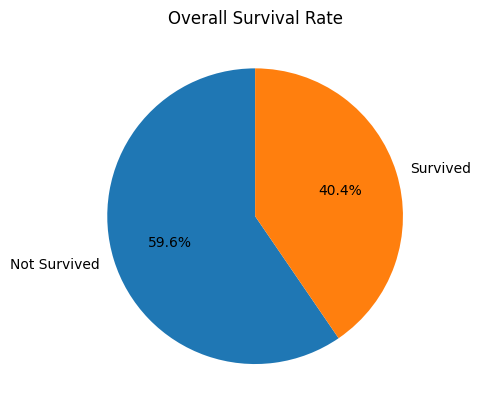

In [ ]:
import matplotlib.pyplot as plt

counts = data["Survived"].value_counts()

# Plot pie chart
plt.pie(counts, 
        labels=['Not Survived', 'Survived'], 
        autopct='%1.1f%%', 
        startangle=90)
plt.title('Overall Survival Rate')
plt.show()

### Visualize survival rates using bar plots

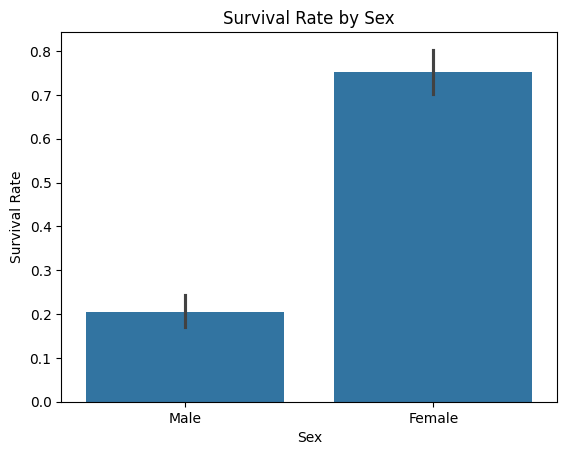

In [ ]:
import seaborn as sns

sns.barplot(x=data['Sex'], y=data['Survived'])

plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()


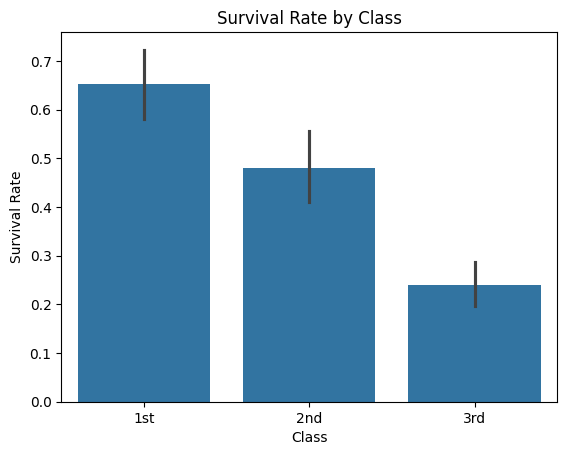

In [ ]:
sns.barplot(x=data['Pclass'], y=data['Survived'])
plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate')
plt.xlabel('Class')
plt.xticks([0, 1, 2], ['1st', '2nd', '3rd'])
plt.show()


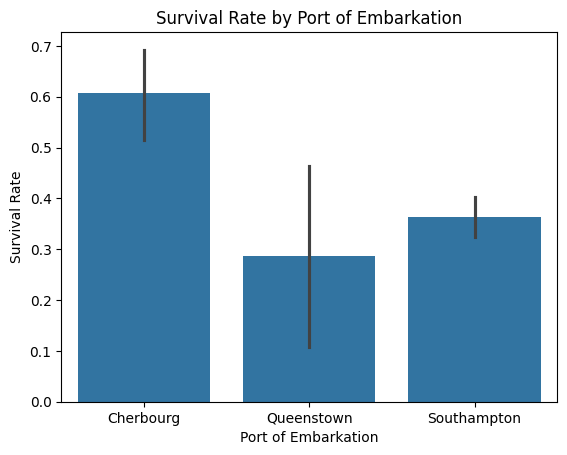

In [ ]:
sns.barplot(x=data['Embarked'], y=data['Survived'])
plt.title('Survival Rate by Port of Embarkation')
plt.ylabel('Survival Rate')
plt.xlabel('Port of Embarkation')
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'])
plt.show()


In [ ]:
# --- Correlation Matrix ---
corr = numeric_cols.corr()
corr

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,-0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145,-0.356462
Sex,-0.150826,1.000000,-0.099037,0.106296,0.249543,0.182457,-0.109639,0.536762
Age,-0.365902,-0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565,-0.082446
SibSp,0.065187,0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064,-0.015523
Parch,0.023666,0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803,0.095265
Fare,-0.552893,0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510,0.266100
Embarked,0.244145,-0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000,-0.181979
Survived,-0.356462,0.536762,-0.082446,-0.015523,0.095265,0.266100,-0.181979,1.000000


<Figure size 2000x1600 with 0 Axes>

<Axes: >

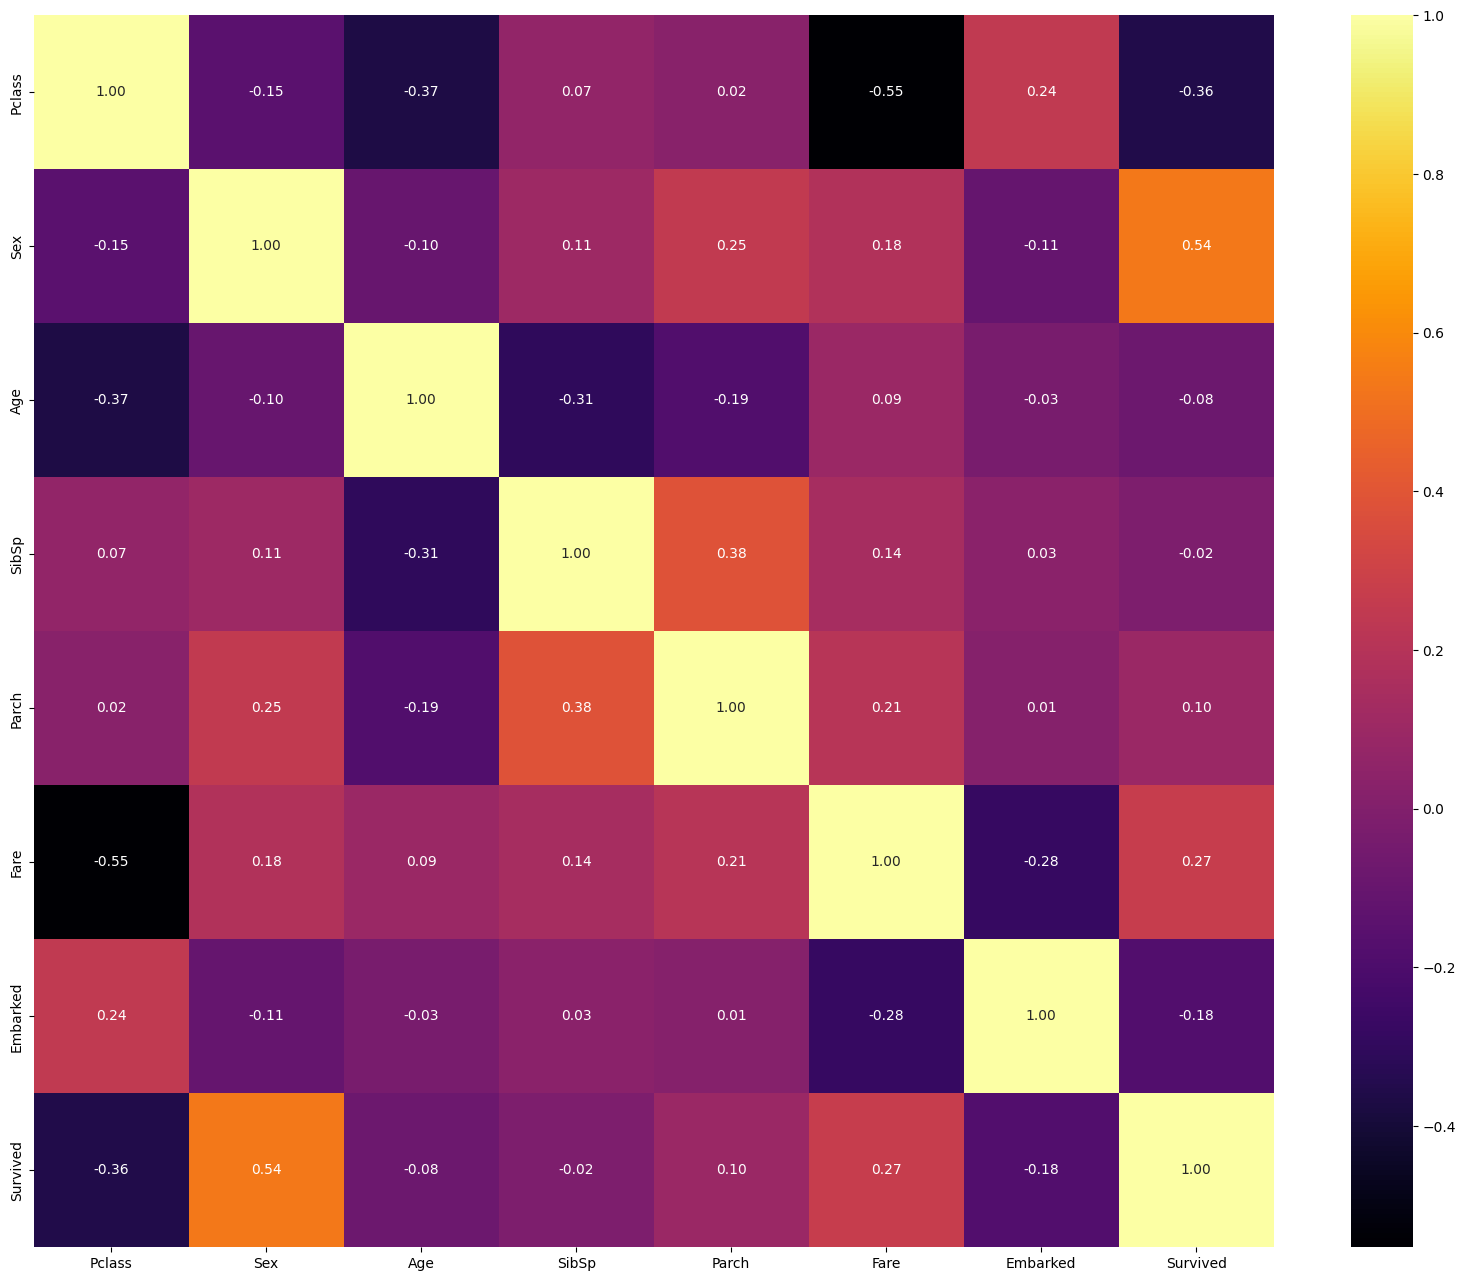

In [ ]:
# --- Correlation Matrix Visualization using heat map ---

plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="inferno")

### Conclusions:
1. Survival strongly favored women (correlation ≈ 0.54).

2. First-class passengers had higher survival rates (negative correlation with class, ≈ -0.36).

3. The majority of survivors boarded at Southampton.
